In [2]:
# estamos frente a un problema de clasificación
# vamos a usar una regresión logística, y después probaremos con otros modelos de ML

**REGRESIÓN LOGÍSTICA**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# levantamos la data de entrenamiento
data_train = pd.read_excel(r'C:\Users\aalbe\OneDrive\Escritorio\Datathon/E-Commerce_train.xlsx')

In [5]:
# visualizamos la data de entrenamiento
data_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


**EDA: Pairplot**

In [6]:
# vamos a visualizar la relación existente entre las distintas series del dataframe de train para encontrar
# las variables que más significancia tienen

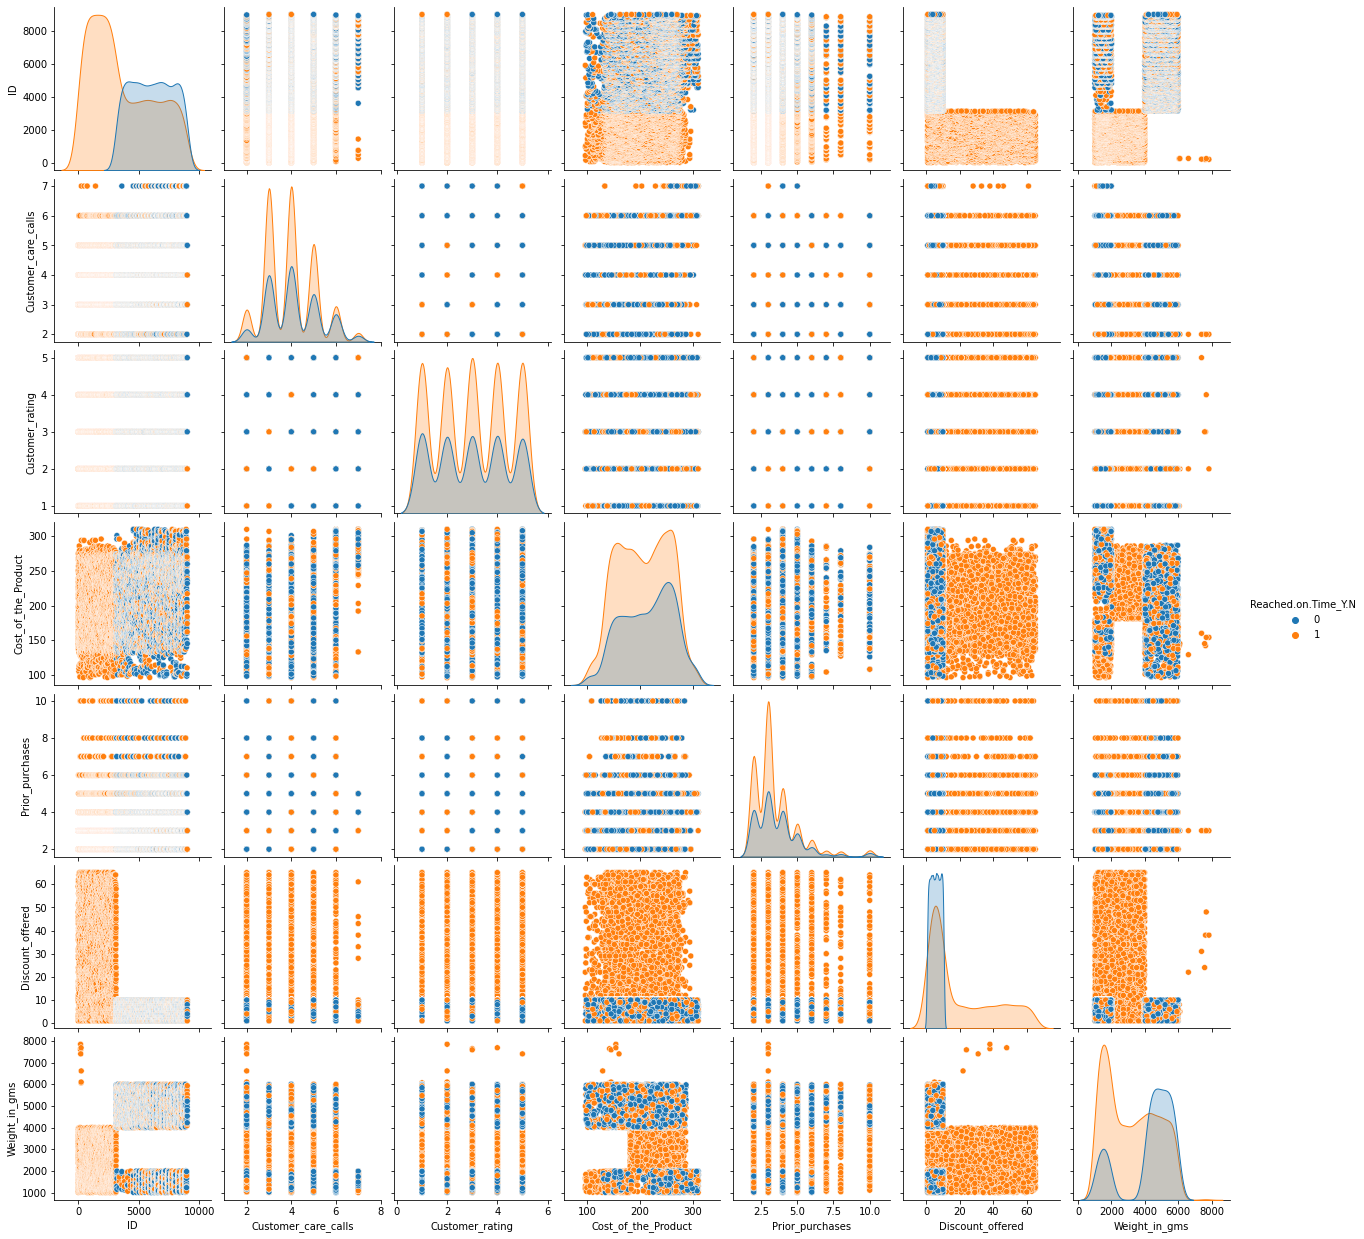

In [7]:
sns.pairplot(data_train, hue="Reached.on.Time_Y.N")
plt.show()

# aquí se observan únicamente las series de variables numéricas, no las categóricas
# esas relaciones se ven más adelante

*vamos a crear un dataframe cuyas series categóricas pasen a ser todas numéricas*

In [8]:
# ahora debemos agregar las columnas que antes eran categóricas, como numéricas

In [9]:
x_warehouse_block = data_train['Warehouse_block'].to_numpy()
x_warehouse_block_list = x_warehouse_block.tolist()
for index, value in enumerate(x_warehouse_block_list):
    if value == 'A':
      x_warehouse_block_list[index] = 0
    elif value == 'B':
      x_warehouse_block_list[index] = 1
    elif value == 'C':
      x_warehouse_block_list[index] = 2
    elif value == 'D':
      x_warehouse_block_list[index] = 3            
    else:
      x_warehouse_block_list[index] = 4

In [10]:
x_mode_of_shipment = data_train['Mode_of_Shipment'].to_numpy()
x_mode_of_shipment_list = x_mode_of_shipment.tolist()
for index, value in enumerate(x_mode_of_shipment_list):
    if value == 'Flight':
      x_mode_of_shipment_list[index] = 0
    elif value == 'Ship':
      x_mode_of_shipment_list[index] = 1
    else:
      x_mode_of_shipment_list[index] = 2

In [11]:
x_product_importance = data_train['Product_importance'].to_numpy()
x_product_importance_list = x_product_importance.tolist()
for index, value in enumerate(x_product_importance_list):
    if value == 'low':
      x_product_importance_list[index] = 0
    elif value == 'medium':
      x_product_importance_list[index] = 1            
    else:
      x_product_importance_list[index] = 2

In [12]:
x_gender = data_train['Gender'].to_numpy()
x_gender_list = x_gender.tolist()
for index, value in enumerate(x_gender_list):
    if value == 'F':
      x_gender_list[index] = 0           
    else:
      x_gender_list[index] = 1

In [13]:
# eliminamos las columnas que contenían datos categóricos
data_train.pop('Warehouse_block')
data_train.pop('Mode_of_Shipment')
data_train.pop('Product_importance')
data_train.pop('Gender')

0       F
1       M
2       M
3       M
4       F
       ..
8994    F
8995    M
8996    F
8997    F
8998    M
Name: Gender, Length: 8999, dtype: object

In [14]:
# agregamos las columnas ahora numéricas de las series categóricas
data_train['Warehouse_block'] = x_warehouse_block_list
data_train['Mode_of_Shipment'] = x_mode_of_shipment_list
data_train['Product_importance'] = x_product_importance_list
data_train['Gender'] = x_gender_list

In [15]:
# acá volvemos a visualizar la data
data_train

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,1,4,2,177,3,44,1233,1,3,0,0,0
1,2,4,5,216,2,59,3088,1,4,0,0,1
2,3,2,2,183,4,48,3374,1,0,0,0,1
3,4,3,3,176,4,10,1177,1,1,0,1,1
4,5,2,2,184,3,46,2484,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,3,1,217,3,1,4177,1,3,1,0,0
8995,8996,5,3,232,3,3,4526,0,4,1,1,1
8996,8997,4,5,260,3,6,4221,0,0,1,1,0
8997,8998,4,2,184,3,5,5931,1,1,1,1,0


In [16]:
# y realizamos entonces un pairplot con toda la información brindada

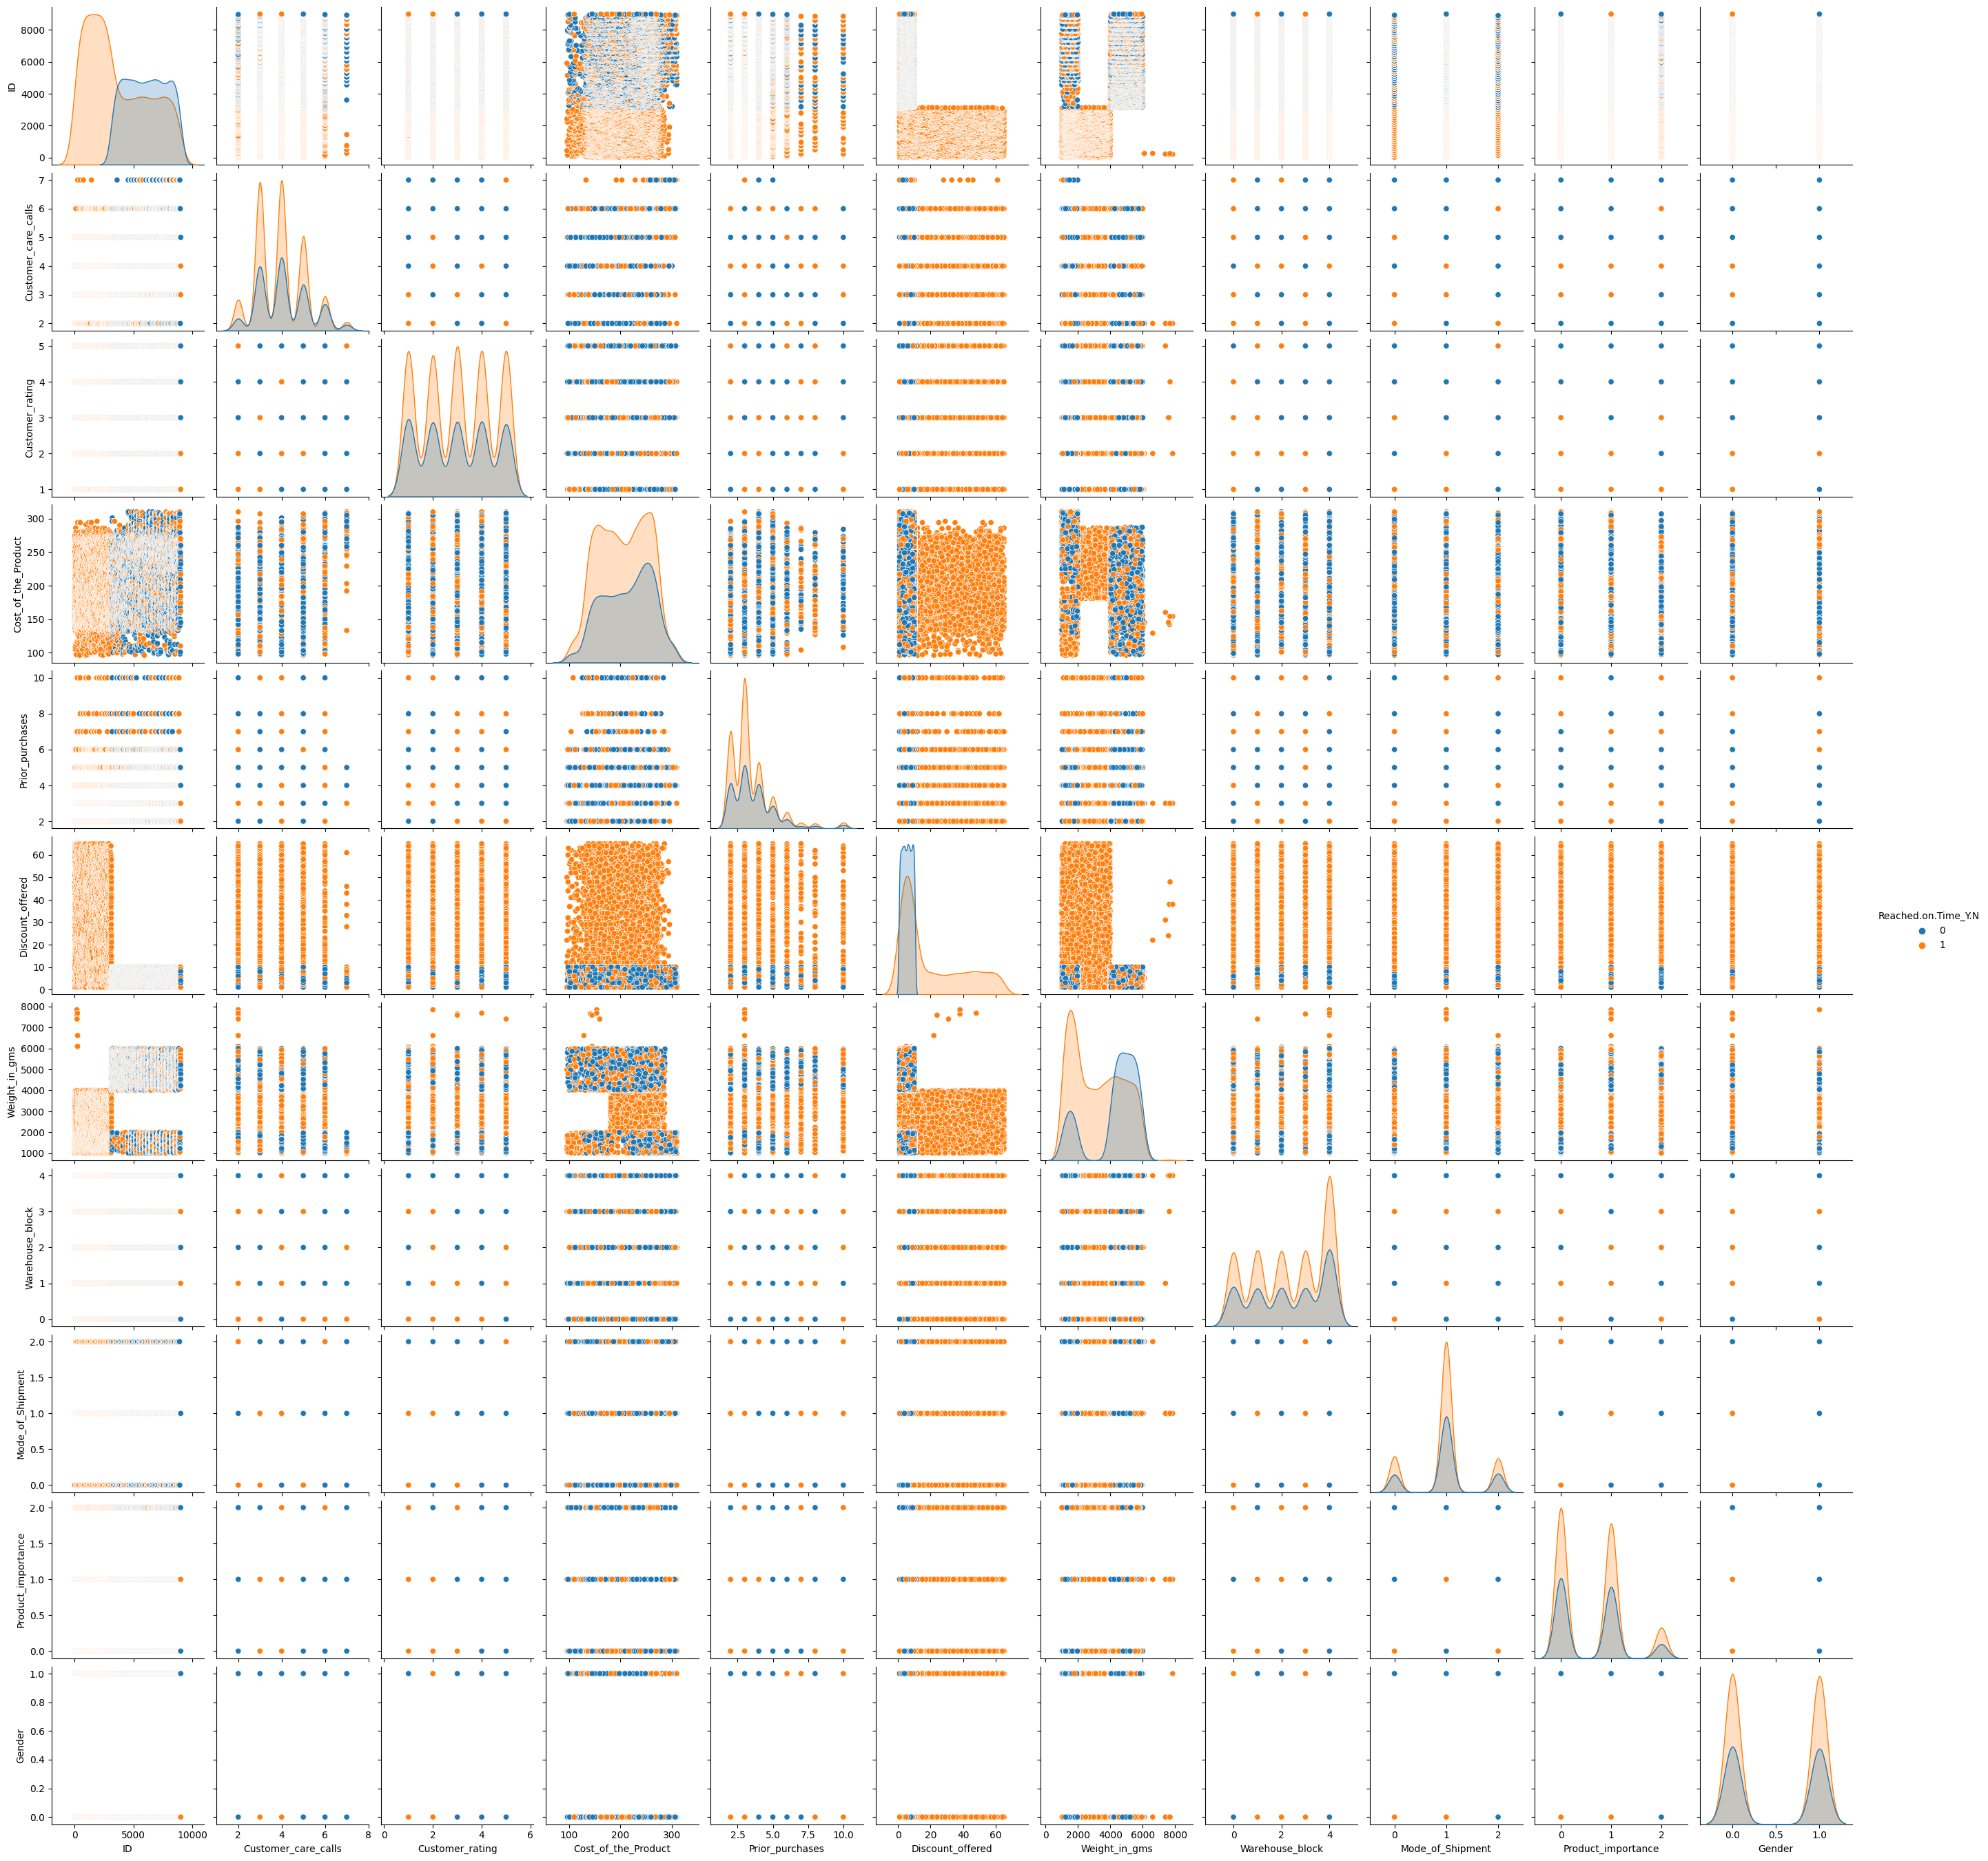

In [17]:
sns.pairplot(data_train, hue="Reached.on.Time_Y.N")
plt.show()

In [18]:
# se concluye que las variables categóricas no influyen en el presente análisis
# además se denota que las variables más influyentes son ID, Discount_offered, Weight_in_gms y Cost_of_the_product
# también, las variables categóricas no parecen agregar ninguna información importante. no influyen

In [66]:
X = data_train[['ID', 'Discount_offered', 'Weight_in_gms', 'Cost_of_the_Product']]
y = data_train['Reached.on.Time_Y.N']

In [68]:
# visualizamos X e y
X

,ID,Discount_offered,Weight_in_gms,Cost_of_the_Product
0,1,44,1233,177
1,2,59,3088,216
2,3,48,3374,183
3,4,10,1177,176
4,5,46,2484,184
...,...,...,...,...
8994,8995,1,4177,217
8995,8996,3,4526,232
8996,8997,6,4221,260
8997,8998,5,5931,184


In [67]:
y

0       1
1       1
2       1
3       1
4       1
       ..
8994    1
8995    0
8996    0
8997    1
8998    0
Name: Reached.on.Time_Y.N, Length: 8999, dtype: int64

**PROBAMOS MODELOS: REGRESIÓN LOGÍSTICA**

In [20]:
# Importamos la clase que contiene el algoritmo de regresíon logística
from sklearn.linear_model import LogisticRegression

In [21]:
# Instanciamos el modelo y lo entrenamos
modelo_logistica = LogisticRegression()

In [69]:
# entrenamos el modelo
modelo_logistica.fit(X.values,y.values)

LogisticRegression()

In [62]:
# importamos accuracy_score para medir accuracy de los modelos
from sklearn.metrics import accuracy_score

In [70]:
y_pred = modelo_logistica.predict(X)

c:\Users\aalbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [71]:
print('El score del modelo_logistica es:', accuracy_score(y, y_pred))

El score del modelo_logistica es: 0.6804089343260362


**ÁRBOL DE DECISIÓN**

In [29]:
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

In [73]:
modelo_arbol.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [74]:
y_pred = modelo_arbol.predict(X.values)

In [76]:
print('El accuracy del modelo_arbol es:', accuracy_score(y,y_pred))

El accuracy del modelo_arbol es: 0.7128569841093455


**K - VECINOS**

In [77]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

modelo_vecinos = KNeighborsClassifier()

# lo entrenamos

modelo_vecinos.fit(X.values,y.values)

KNeighborsClassifier()

In [78]:
y_pred = modelo_vecinos.predict(X.values)

In [79]:
print(accuracy_score(y,y_pred))

0.8034226025113902


**MEDICIÓN DE ACCURACY DE LOS MODELOS**

In [39]:
y_pred = modelo_vecinos.predict(X.values)
print('El accuracy del modelo es:', accuracy_score(y,y_pred))

El accuracy del modelo es: 0.8034226025113902


**TEST**

In [40]:
data_test = pd.read_excel(r'C:\Users\aalbe\OneDrive\Escritorio\Datathon/E-Commerce_test.xlsx')

In [41]:
data_test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


In [42]:
# cambiamos las variables categóricas a numéricas
x_warehouse_block = data_test['Warehouse_block'].to_numpy()
x_warehouse_block_list = x_warehouse_block.tolist()
for index, value in enumerate(x_warehouse_block_list):
    if value == 'A':
      x_warehouse_block_list[index] = 0
    elif value == 'B':
      x_warehouse_block_list[index] = 1
    elif value == 'C':
      x_warehouse_block_list[index] = 2
    elif value == 'D':
      x_warehouse_block_list[index] = 3            
    else:
      x_warehouse_block_list[index] = 4

In [43]:
x_mode_of_shipment = data_test['Mode_of_Shipment'].to_numpy()
x_mode_of_shipment_list = x_mode_of_shipment.tolist()
for index, value in enumerate(x_mode_of_shipment_list):
    if value == 'Flight':
      x_mode_of_shipment_list[index] = 0
    elif value == 'Ship':
      x_mode_of_shipment_list[index] = 1
    else:
      x_mode_of_shipment_list[index] = 2

In [44]:
x_product_importance = data_test['Product_importance'].to_numpy()
x_product_importance_list = x_product_importance.tolist()
for index, value in enumerate(x_product_importance_list):
    if value == 'low':
      x_product_importance_list[index] = 0
    elif value == 'medium':
      x_product_importance_list[index] = 1            
    else:
      x_product_importance_list[index] = 2

In [45]:
x_gender = data_test['Gender'].to_numpy()
x_gender_list = x_gender.tolist()
for index, value in enumerate(x_gender_list):
    if value == 'F':
      x_gender_list[index] = 0           
    else:
      x_gender_list[index] = 1

In [46]:
# eliminamos las columnas que contenían datos categóricos
data_test.pop('Warehouse_block')
data_test.pop('Mode_of_Shipment')
data_test.pop('Product_importance')
data_test.pop('Gender')

0       M
1       F
2       M
3       M
4       M
       ..
1995    F
1996    F
1997    F
1998    M
1999    F
Name: Gender, Length: 2000, dtype: object

In [47]:
# agregamos las columnas ahora numéricas de las series categóricas
data_test['Warehouse_block'] = x_warehouse_block_list
data_test['Mode_of_Shipment'] = x_mode_of_shipment_list
data_test['Product_importance'] = x_product_importance_list
data_test['Gender'] = x_gender_list

In [48]:
# visualizamos el nuevo set de datos de prueba
data_test

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,9000,5,1,189,2,10,5248,4,1,1,1
1,9001,5,3,150,2,9,4446,3,1,2,0
2,9002,3,3,200,3,3,5739,4,1,0,1
3,9003,5,1,133,2,1,4643,0,1,1,1
4,9004,4,2,260,3,4,5504,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,4,1,252,5,1,1538,0,1,1,0
1996,10996,4,1,232,5,6,1247,1,1,1,0
1997,10997,5,4,242,5,4,1155,2,1,0,0
1998,10998,5,2,223,6,2,1210,4,1,1,1


In [80]:
# tomamos la info para el testeo (las columnas que consideramos más significativas)
data_test = data_test[['ID','Discount_offered','Weight_in_gms','Cost_of_the_Product']]

**prueba con k vecinos**

In [81]:
# guardamos los valores en una variable para convertirlos en un csv
pipilar_1 = modelo_vecinos.predict(data_test)

c:\Users\aalbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [84]:
# visualizamos el array
pipilar_1

array([0, 1, 0, 1, 1], dtype=int64)

In [83]:
# con el método savetxt guardamos el csv
np.savetxt('Pipilar.csv', pipilar_1, delimiter= ',')
# Pipilar(1)

**prueba con árbol de regresión**

In [53]:
pipilar_2 = modelo_arbol.predict(data_test)
pipilar_2

c:\Users\aalbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
np.savetxt('Pipilar.csv', pipilar_2, delimiter= ',')
# Pipilar(2)

**prueba con regresión logística**

In [55]:
modelo_logistica.predict(data_test)[:5]

c:\Users\aalbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0], dtype=int64)

--------------------------------------------------------------------------------------------------

**RANDOM FOREST**

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
modelo_random_forest = RandomForestRegressor()
modelo_random_forest.fit(X.values,y.values)

RandomForestRegressor()

In [58]:
modelo_random_forest.predict(data_test)

c:\Users\aalbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([0.58, 0.56, 0.49, ..., 0.37, 0.32, 0.16])

In [59]:
y_pred = modelo_random_forest.predict(X.values)
print('El accuracy del modelo es:', accuracy_score(y,y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets